# Lab | Cleaning numerical data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns 

In [6]:
list(customer_df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [7]:
customer_df.rename({'EmploymentStatus': 'Employment Status'}, inplace=True, axis=1)


In [8]:
for c in list(customer_df.columns):
        name = c.lower()
        name=name.replace(' ', '_')
        customer_df.rename({c: name}, inplace=True, axis=1)


In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Change effective to date column to datetime format.

In [10]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [11]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Check NaN values per column.

In [12]:
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


### Define a function that differentiates between continuous and discrete variables

In [13]:
customer_df['income'] = customer_df['income'].astype('float64') 

In [14]:
def data_type(x):
    cat_lst=[]
    dis_lst=[]
    con_lst=[]
    
    for c in list(x.columns):
        if x[c].dtypes == 'object':
            cat_lst.append(c)
        elif x[c].dtypes == 'int64':
            dis_lst.append(c)
        else:
            con_lst.append(c)
    
    return cat_lst,dis_lst,con_lst
                
                

In [35]:

data=data_type(customer_df)
continuous=customer_df[data[2]]
discrete=customer_df[data[1]]
categorical=customer_df[data[0]]

In [16]:
continuous.head()

,customer_lifetime_value,effective_to_date,income,total_claim_amount
0,2763.519279,2011-02-24,56274.0,384.811147
1,6979.535903,2011-01-31,0.0,1131.464935
2,12887.431650,2011-02-19,48767.0,566.472247
3,7645.861827,2011-01-20,0.0,529.881344
4,2813.692575,2011-02-03,43836.0,138.130879


In [17]:
discrete.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [18]:
categorical.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it

In [36]:
def cat(x):
    for c in list(x.columns):
        print(x[c].value_counts(),'\n')

In [37]:
m=cat(categorical)

BJ53923    1
XD32841    1
JO90877    1
YQ79307    1
GH94657    1
          ..
AQ52711    1
XL81489    1
KF96171    1
NS38229    1
EN54716    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

P

In [38]:
categorical.drop(columns='customer',inplace=True)

# Lab 2
# Lab | Cleaning categorical data

#### Plot a correlation matrix, 

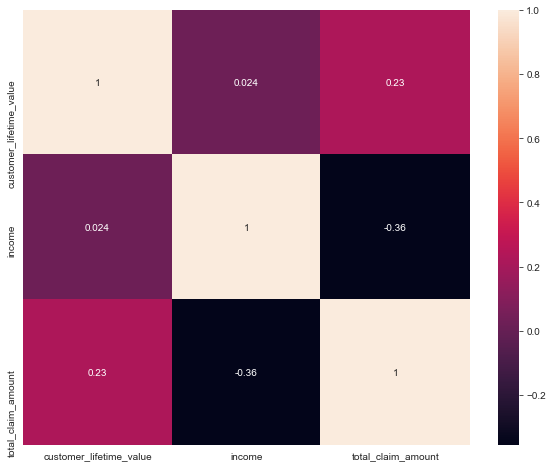

In [21]:
#continuous data
corr_matrix=continuous.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

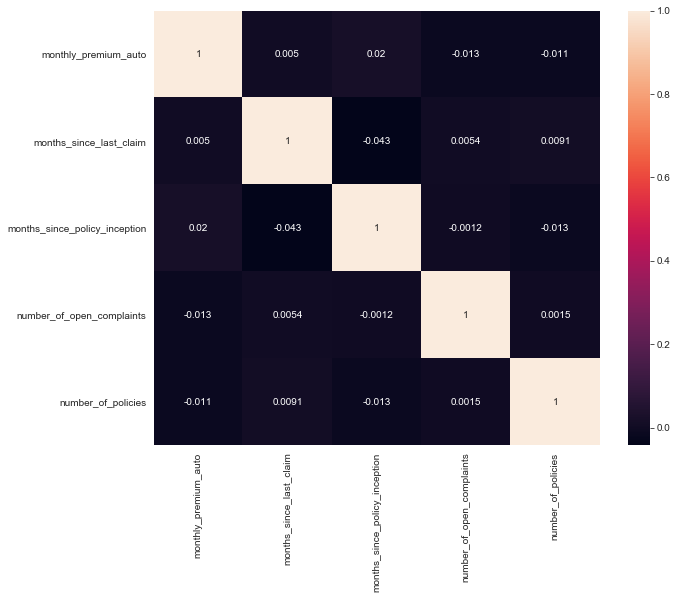

In [22]:
#discrete data

corr_matrix=discrete.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

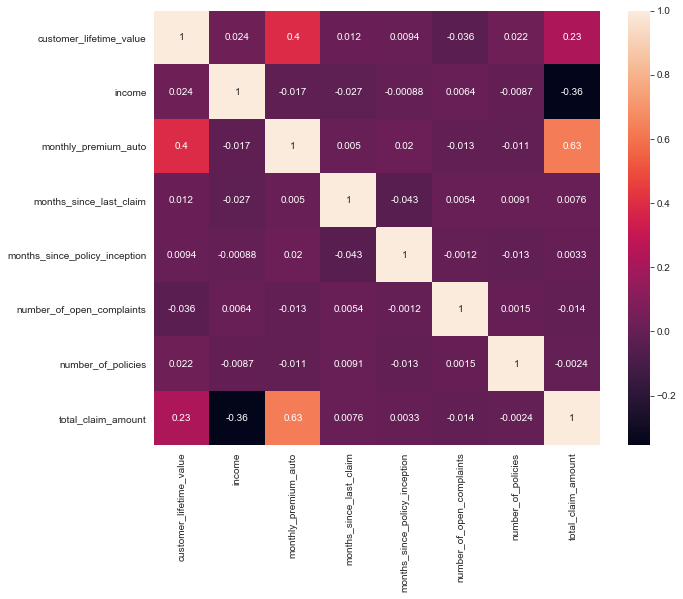

In [23]:
#all numericals
corr_matrix=customer_df.select_dtypes(include = 'number').corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Create a function to plot every discrete variables. Do the same with continuous variables

In [24]:
def polt_dis(data):
    for col in list(data.columns):
        sns.distplot(data[col])
        plt.show()

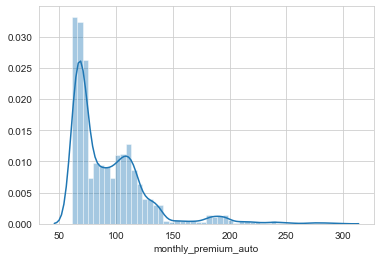

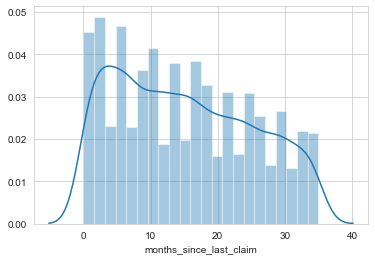

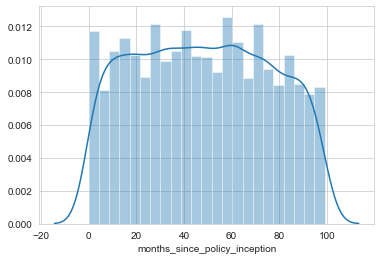

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

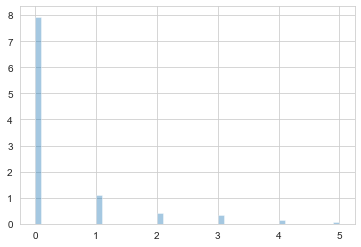

In [25]:
disc=polt_dis(discrete.select_dtypes(include = 'number'))

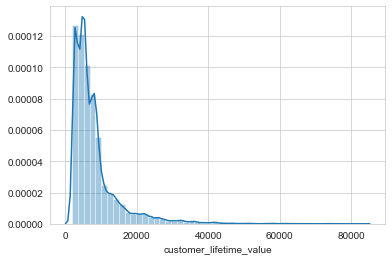

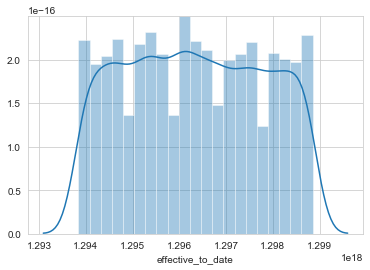

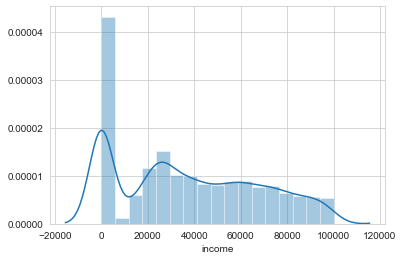

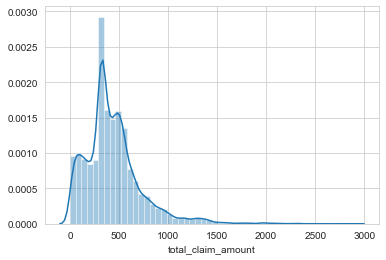

In [26]:
cont=polt_dis(continuous)

In [27]:
def polt_box(data):
    for col in list(data.columns):
        sns.boxplot(data[col])
        plt.show()


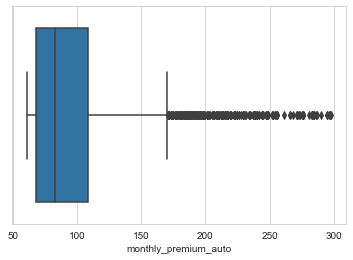

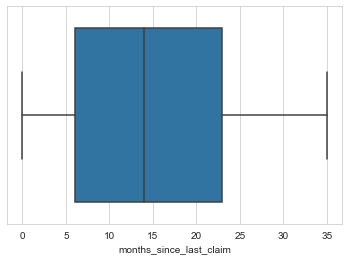

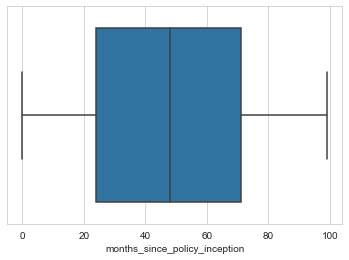

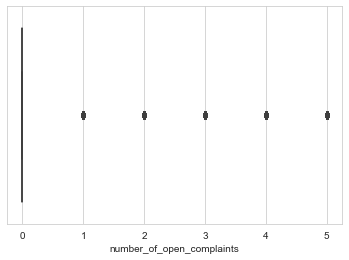

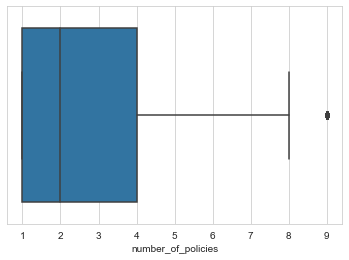

In [28]:
disc_box=polt_box(discrete)

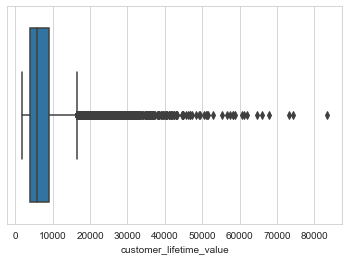

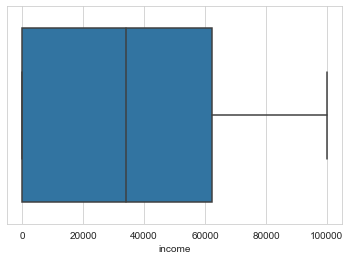

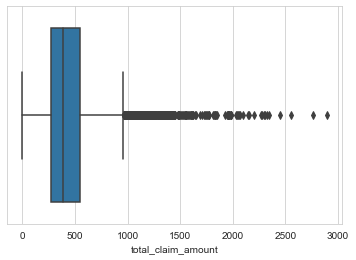

In [29]:
cont_box=polt_box(continuous.select_dtypes(include = 'number'))

# Lab 3
# Lab | Feature extraction

#### Plot all the categorical variables with the proper plot. What can you see?

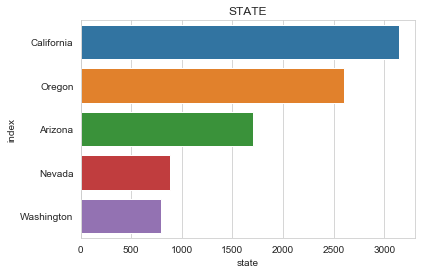

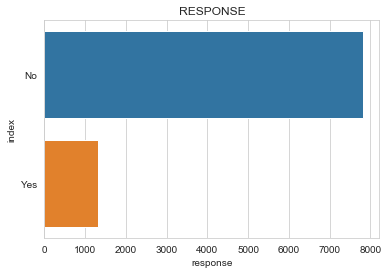

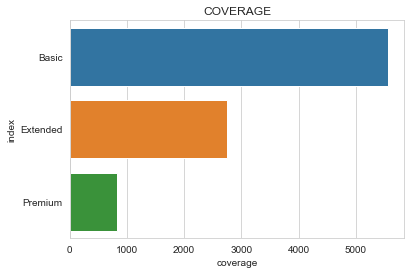

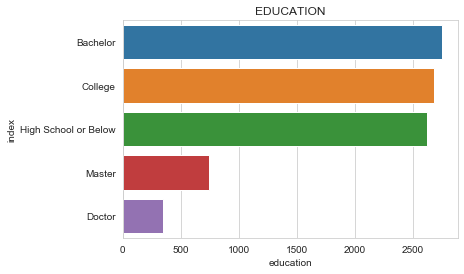

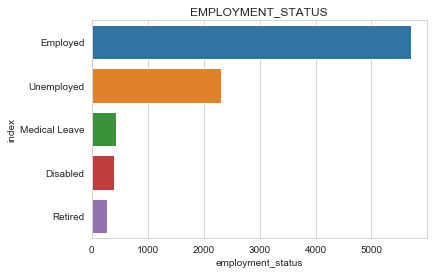

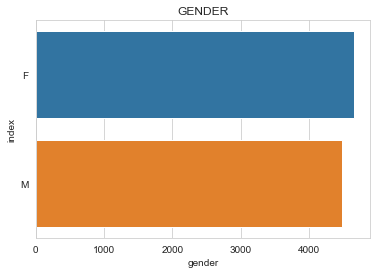

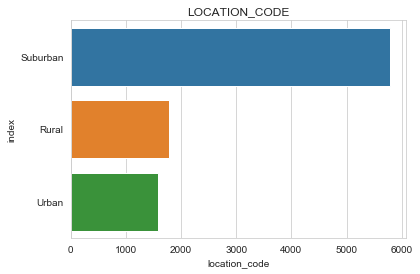

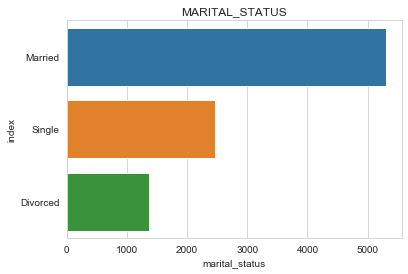

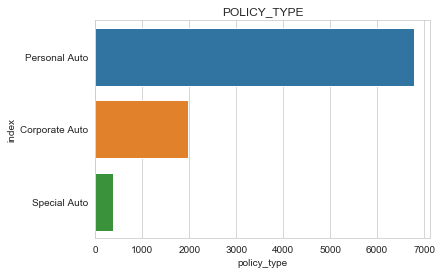

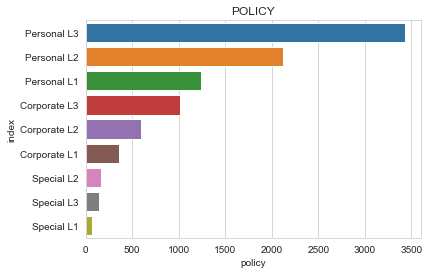

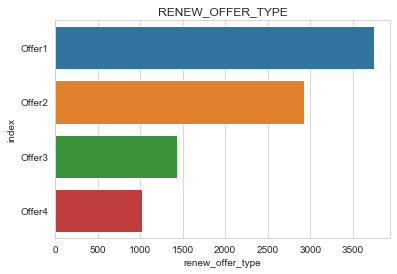

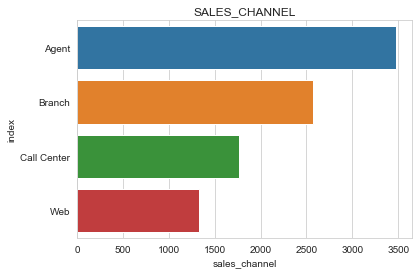

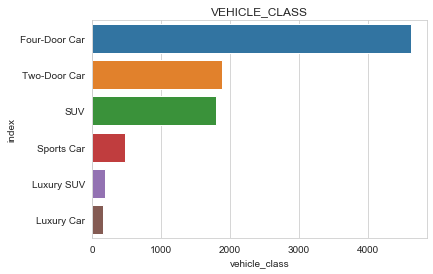

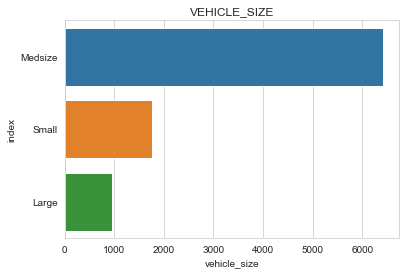

<Figure size 432x288 with 0 Axes>

In [39]:
cols_cat = list(categorical.columns)

for col in cols_cat:
    my_data = categorical[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()

#### Plot time variable. Can you extract something from it?

In [41]:
customer_df['year'] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011


In [42]:
customer_df['year'].unique()

array([2011], dtype=int64)

In [45]:
# drope year columns - same year
customer_df.drop(columns='year',inplace=True)

In [43]:
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2


In [44]:
customer_df['month'].unique()

array([2, 1], dtype=int64)

In [46]:
customer_df['day'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [47]:
customer_df['day'].unique()

array([24, 31, 19, 20,  3, 25, 18, 26, 17, 21,  6, 10,  5, 27, 14, 29, 28,
       12,  2,  7, 22, 13, 15,  8, 11, 23, 16,  9,  4,  1, 30],
      dtype=int64)

In [69]:
# we will group days by week number

customer_df['day'] = np.where(customer_df['day'] < 8 ,1,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] < 15) & (customer_df['day'] > 8))  ,2,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] < 22) & (customer_df['day'] >= 15)) ,3,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] <= 31) & (customer_df['day'] >= 22)) ,4,customer_df['day'])

In [70]:
customer_df['day'].unique()

array([4, 3, 1, 2], dtype=int64)

In [72]:
# change day columns to week 
customer_df.rename(columns={'day':'week'},inplace=True)

In [73]:
#drop effective_to_date 
customer_df.drop(columns='effective_to_date',inplace=True)

# Lab 4

# Lab | Data cleaning and wrangling